<a href="https://colab.research.google.com/github/PallaviVangari/DataMining/blob/main/TimeSeriesWithoutExogenousVariables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
!pip install pycaret
from pycaret.regression import *
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 17.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 80.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 77.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 60.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 98.3 MB/s eta 0:

In [5]:
df = pd.read_csv('/content/raw_sales.csv')

In [6]:
df.rename(columns={'Timestamp': 'ds', 'Value': 'sales'}, inplace=True)

In [8]:
reg_setup = setup(data=df, target='price', session_id=123, train_size=0.8)

,Description,Value
0,Session id,123
1,Target,price
2,Target type,Regression
3,Original data shape,"(29580, 5)"
4,Transformed data shape,"(29580, 5)"
5,Transformed train set shape,"(23664, 5)"
6,Transformed test set shape,"(5916, 5)"
7,Ordinal features,1
8,Numeric features,2
9,Categorical features,2


In [9]:
train_data = get_config('X_train')
test_data = get_config('X_test')
train_target = get_config('y_train')
test_target = get_config('y_test')

In [10]:
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)
model = SARIMAX(train_target, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
model_fit = model.fit()

In [11]:
forecast = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic=False)

In [12]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_target, forecast)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 304028.7350269018


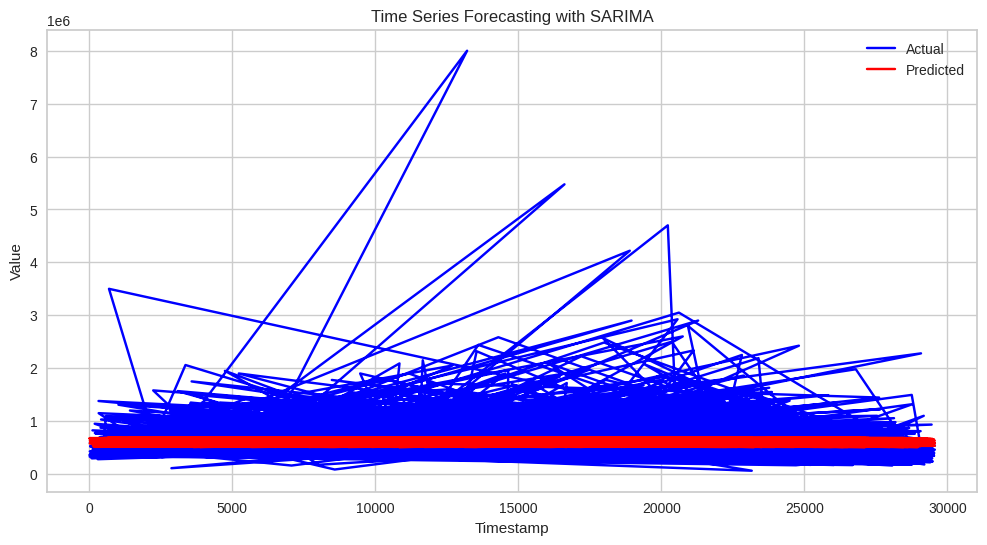

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_target, label='Actual', color='blue')
plt.plot(test_data.index, forecast, label='Predicted', color='red')
plt.title('Time Series Forecasting with SARIMA')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.show()